1. Import des librairies

In [1]:
import requests
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt


2. Paramètres du projet

In [7]:
# Localisation : Nice
latitude = 43.7000
longitude = 7.2500

# Date analysée
jour = date(2024, 2, 25)  # Tu peux changer la date ici

print("Date analysée :", jour)


Date analysée : 2024-02-25


Test API

In [ ]:
test = requests.get(
    "https://archive-api.open-meteo.com/v1/archive",
    params={
        "latitude": 43.7,
        "longitude": 7.25,
        "hourly": "temperature_2m",
        "start_date": "2024-02-25",
        "end_date": "2024-02-25"
    }
)

print(test.status_code)
print(test.json().keys())


3. Fonction pour récupérer les données météo d’un jour donné

In [8]:
def get_meteo_day(jour, latitude, longitude):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "hourly": "temperature_2m",
        "start_date": jour.isoformat(),
        "end_date": jour.isoformat()
    }
    
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame({
        "datetime": data["hourly"]["time"],
        "temperature": data["hourly"]["temperature_2m"]
    })

    df["datetime"] = pd.to_datetime(df["datetime"])
    return df

4. Récupération des données du jour

In [9]:
df = get_meteo_day(jour, latitude, longitude)
df.head()


,datetime,temperature
0,2024-02-25 00:00:00,4.0
1,2024-02-25 01:00:00,4.8
2,2024-02-25 02:00:00,4.3
3,2024-02-25 03:00:00,4.0
4,2024-02-25 04:00:00,4.1


5. Statistiques du jour (min / max / moyenne)

In [10]:
temp_min = df["temperature"].min()
temp_max = df["temperature"].max()
temp_mean = df["temperature"].mean()

print("Température minimale :", round(temp_min, 2), "°C")
print("Température maximale :", round(temp_max, 2), "°C")
print("Température moyenne  :", round(temp_mean, 2), "°C")


Température minimale : 4.0 °C
Température maximale : 12.8 °C
Température moyenne  : 8.27 °C


6. Comparaison avec la veille

In [11]:
jour_veille = jour - timedelta(days=1)
df_prev = get_meteo_day(jour_veille, latitude, longitude)

temp_mean_prev = df_prev["temperature"].mean()

print("Température moyenne veille :", round(temp_mean_prev, 2), "°C")
print("Différence (jour - veille) :", round(temp_mean - temp_mean_prev, 2), "°C")


Température moyenne veille : 8.3 °C
Différence (jour - veille) : -0.03 °C


7. Comparaison avec la moyenne du mois

In [14]:
start_month = jour.replace(day=1)
end_month = jour

url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": "temperature_2m",
    "start_date": start_month.isoformat(),
    "end_date": end_month.isoformat()
}

response = requests.get(url, params=params)
data_month = response.json()

df_month = pd.DataFrame({
    "datetime": data_month["hourly"]["time"],
    "temperature": data_month["hourly"]["temperature_2m"]
})

df_month["datetime"] = pd.to_datetime(df_month["datetime"])
monthly_mean = df_month["temperature"].mean()

print("Température moyenne du mois :", round(monthly_mean, 2), "°C")
print("Écart jour vs moyenne du mois :", round(temp_mean - monthly_mean, 2), "°C")


Température moyenne du mois : 10.31 °C
Écart jour vs moyenne du mois : -2.04 °C


8. Visualisation simple

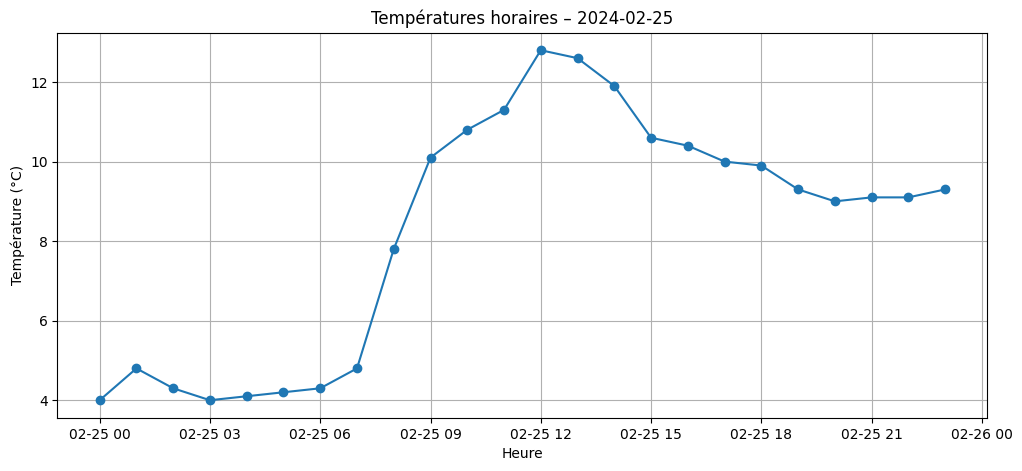

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(df["datetime"], df["temperature"], marker="o")
plt.title(f"Températures horaires – {jour}")
plt.xlabel("Heure")
plt.ylabel("Température (°C)")
plt.grid(True)
plt.show()


9. Résumé final

In [16]:
print("=== Résumé du jour ===")
print("Date :", jour)
print("Min :", round(temp_min, 2), "°C")
print("Max :", round(temp_max, 2), "°C")
print("Moyenne :", round(temp_mean, 2), "°C")
print("Différence avec la veille :", round(temp_mean - temp_mean_prev, 2), "°C")
print("Différence avec la moyenne du mois :", round(temp_mean - monthly_mean, 2), "°C")


=== Résumé du jour ===
Date : 2024-02-25
Min : 4.0 °C
Max : 12.8 °C
Moyenne : 8.27 °C
Différence avec la veille : -0.03 °C
Différence avec la moyenne du mois : -2.04 °C
